<h1>Import Libraries and Read Data</h1>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
#SVC -> Support Vector Classification
#SVR -> Support Vector Regression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("Heart data.csv")
#fill missing value 
data = data.fillna(0)
# axis : {0 or 'index', 1 or 'columns'}, default 0
x = data.drop("c" , axis = 1)
y = data.c
data.head(10)

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
5,57,1,4,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
6,56,0,2,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
7,44,1,2,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
8,52,1,3,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
9,57,1,3,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0


<h1>Count each class</h1>

In [4]:
# 0 -> not having Heart attack
# 1 -> have Heart attack
data.c.value_counts()

0    352
1    245
Name: c, dtype: int64

<h2>SVC -> kernel = linear</h2>

In [7]:
# decision_function_shape : {'ovo', 'ovr'}, default='ovr'
# ovr -> one-vs-rest | ovo -> one-vs-one
x_new = data[['blood pressure','heart rate']]
svm_linear = SVC(kernel="linear", decision_function_shape ='ovo')
score = cross_val_score(svm_linear, x_new, y ,cv = 5)
score.mean()

0.6650840336134454

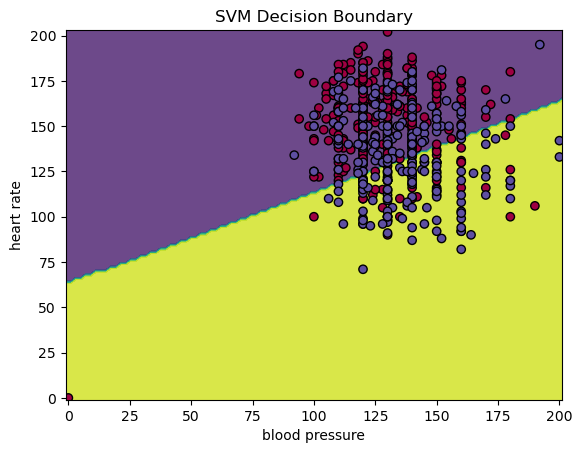

In [8]:
svm_linear.fit(x_new,y)
DecisionBoundaryDisplay.from_estimator(svm_linear, x_new, response_method="predict", alpha=.8)
plt.scatter(x_new[['blood pressure']], x_new[['heart rate']], c=y,edgecolors='black', cmap=plt.cm.Spectral)
plt.xlabel('blood pressure')
plt.ylabel('heart rate')
plt.title('SVM Decision Boundary')
plt.show()

<h2>compare predict value vs actual value</h2> 


In [10]:
pred = cross_val_predict(svm_linear, x, y, cv = 5)
predict = pd.DataFrame({"actual" : y.values , "predict" : pred})
predict.head(10)

,actual,predict
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


<h2>SVC -> kernel = rbf</h2>

In [12]:
#class_wieght -> handle imbalanced data 
#It adjusts the importance of each class when calculating the loss function,
svm_rbf = SVC(kernel="rbf", C = .2,gamma = .2, class_weight={0:.6, 1:.4})
score = cross_val_score(svm_rbf, x, y, cv = 5)
score.mean()

0.5896078431372549

In [13]:
svm_rbf2 = SVC(kernel="rbf", C = .2 ,gamma = .2, class_weight={0:.4, 1:.6})
score = cross_val_score(svm_rbf2, x, y ,cv = 5)
score.mean()

0.41039215686274505

<h2>SVC -> kernel = poly</h2>

In [15]:
#map the input features into a higher-dimensional space
x_new = data[['blood pressure','heart rate']]
svm_poly = SVC(kernel="poly", degree = 2)
score = cross_val_score(svm_poly, x_new, y ,cv = 5)
score.mean()

0.6584173669467788

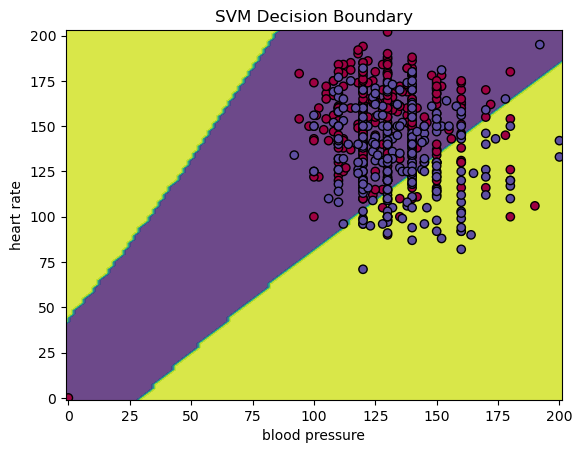

In [16]:
svm_poly.fit(x_new,y)
DecisionBoundaryDisplay.from_estimator(svm_poly, x_new, response_method="predict", alpha=.8)
plt.scatter(x_new[['blood pressure']], x_new[['heart rate']], c=y,edgecolors='black', cmap=plt.cm.Spectral)
plt.xlabel('blood pressure')
plt.ylabel('heart rate')
plt.title('SVM Decision Boundary')
plt.show()

<h2>SVC -> kernel = sigmoid</h2>

In [18]:
x_new = data[['blood pressure','heart rate']]

svm_sigmoid = SVC(kernel="sigmoid", C = .1,gamma = 2, class_weight={0:.6, 1:.5})
score = cross_val_score(svm_sigmoid, x_new, y, cv = 5)
score.mean()

0.5896078431372549

<h2>Tuning Using GridSearch</h2>

In [ ]:
# you use probability-based methods like shuffle=True in GridSearchCV or cross-validation,
#the data may be shuffled before splitting into training and testing sets.
svm = SVC(class_weight={0:.6, 1:.4}, random_state = 8)
param = [{"kernel" : ["linear"] ,"C" : [0.01 , 0.1, 1, 10, 100]},
         {"kernel" : ["rbf"], "gamma" : [0.01, 0.1, 0.2, 0.3], "C":  [0.01 , 0.1, 1, 10, 100]},
         {"kernel" : ["poly"], "degree": [2,3], "C": [0.01, 0.1, 1, 10, 100]},
         {"kernel" : ["sigmoid"], "C" : [0.1, 1, 10], "gamma" : [0.1, 1, 10]}]

         
GS= GridSearchCV(svm, param, cv = 5, scoring = "accuracy" )
         
GS.fit(x , y) 

In [21]:
GS.best_score_

0.8228151260504204

In [22]:
svm_final = SVC(C=1, class_weight={0: 0.6, 1: 0.4}, kernel='linear', random_state=8)
score = cross_val_score(svm_final, x, y ,cv = 5)
score.mean()

0.8228151260504204

In [23]:
pred = cross_val_predict(svm_final, x, y, cv = 5)
predict = pd.DataFrame({"actual" : y.values , "predict" : pred})
predict.head(10)

,actual,predict
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
